In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [183]:
df = pd.read_csv('sentimentdataset.csv')

In [184]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [185]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
df.head(5)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Text       732 non-null    object 
 1   Sentiment  732 non-null    object 
 2   Timestamp  732 non-null    object 
 3   User       732 non-null    object 
 4   Platform   732 non-null    object 
 5   Hashtags   732 non-null    object 
 6   Retweets   732 non-null    float64
 7   Likes      732 non-null    float64
 8   Country    732 non-null    object 
 9   Year       732 non-null    int64  
 10  Month      732 non-null    int64  
 11  Day        732 non-null    int64  
 12  Hour       732 non-null    int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 74.5+ KB


In [188]:
df.describe()

,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [189]:
df.isnull().sum()

Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

### Top 20 Sentiment Distribution

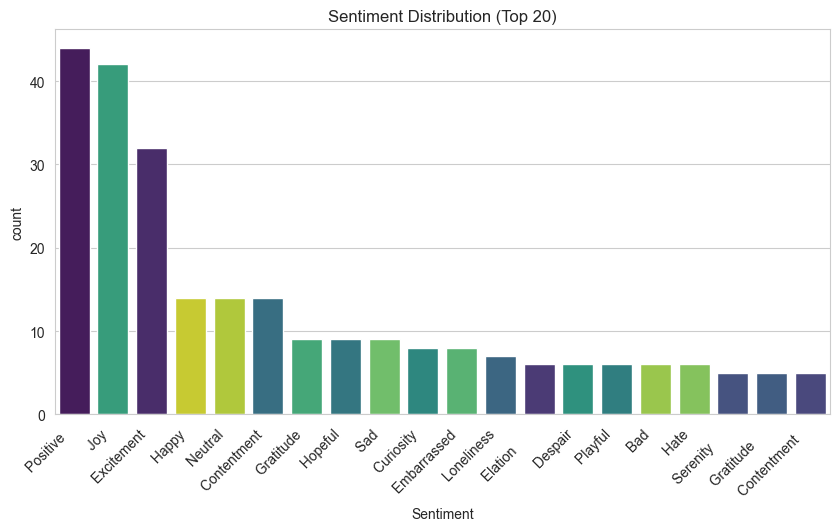

In [162]:
sns.set_style("whitegrid")

# Get the top 20 most used sentiments
top_20_sentiments = df["Sentiment"].value_counts().nlargest(20).index
filtered_df = df[df["Sentiment"].isin(top_20_sentiments)]

# Plot
plt.figure(figsize=(10, 5))
sns.countplot(data=filtered_df, x="Sentiment", hue="Sentiment", palette="viridis", order=top_20_sentiments)
plt.title("Sentiment Distribution (Top 20)")
plt.xticks(rotation=45, ha="right")

plt.show()

### Distribution of Platform

In [168]:
df['Platform'].unique()
df['Platform'] = df['Platform'].str.strip().str.capitalize()

In [169]:
df['Platform'].unique()

array(['Twitter', 'Instagram', 'Facebook'], dtype=object)

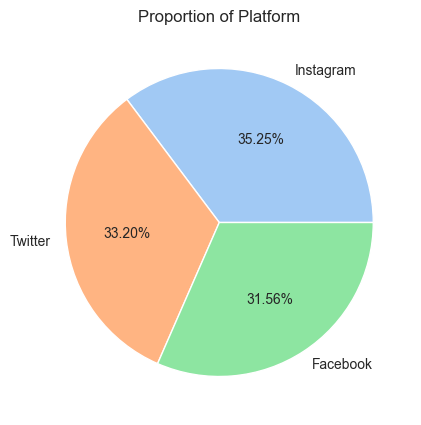

In [170]:
colors = sns.color_palette("pastel", n_colors=df['Platform'].nunique())

# Plot
plt.figure(figsize=(10, 5))
df['Platform'].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=colors)
plt.title("Proportion of Platform")
plt.ylabel("")

plt.show()

### Likes per sentiment

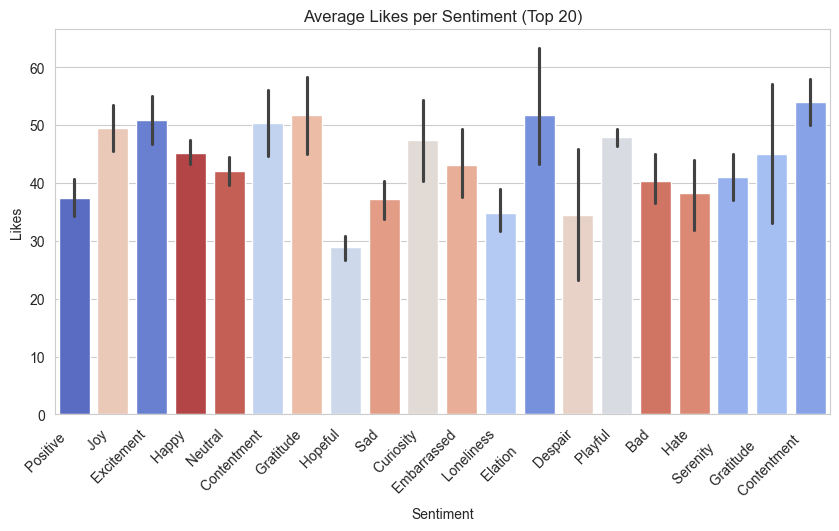

In [171]:
plt.figure(figsize=(10, 5))

sns.barplot(
    x=filtered_df["Sentiment"], 
    y=filtered_df["Likes"], 
    palette="coolwarm",
    hue= filtered_df["Sentiment"],
    order=top_20_sentiments
)
plt.title("Average Likes per Sentiment (Top 20)")
plt.xticks(rotation=45, ha="right")

plt.show()

### Correlation Heatmap between Likes and Retweet
Extremely related

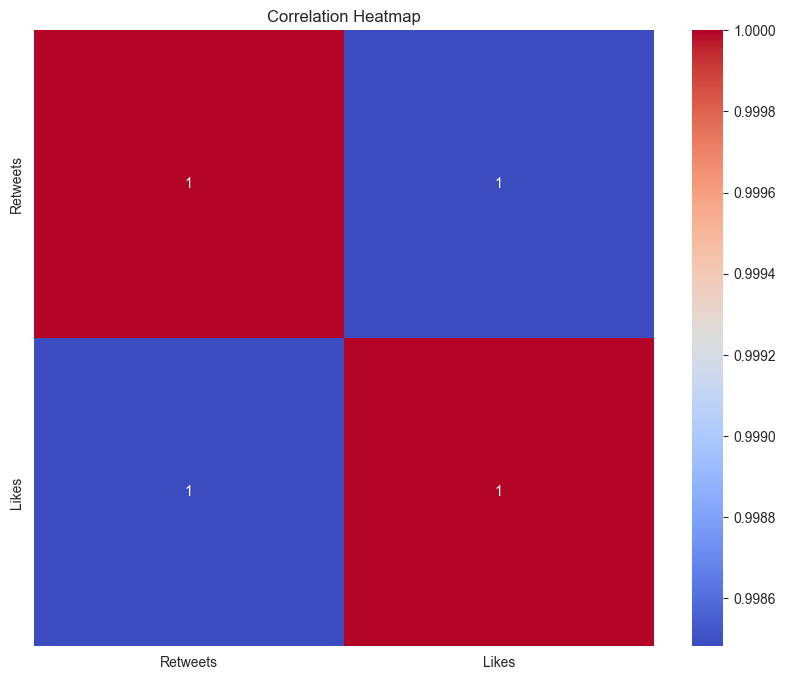

In [172]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.drop(columns=['Year','Month','Day','Hour'],inplace=True)
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Correlation between Retweets and Likes (Top 20 sentiments)

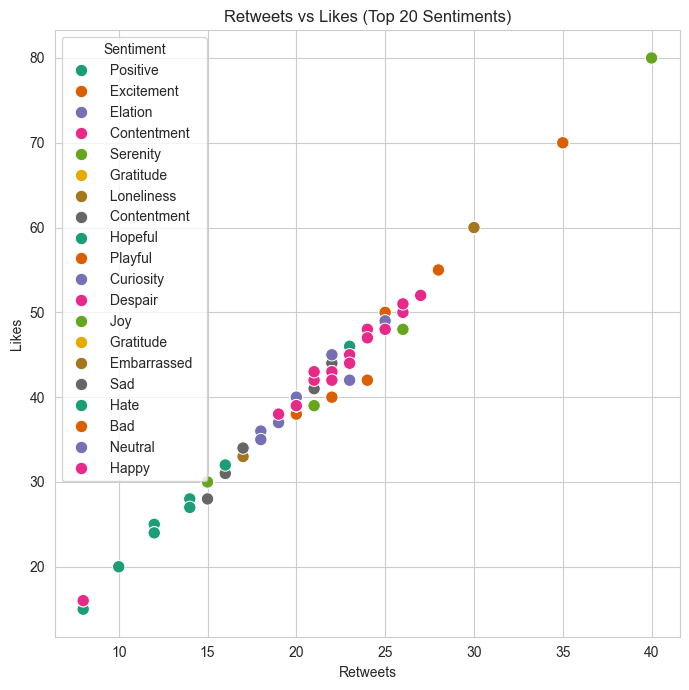

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get top 20 most common sentiments
top_20 = df['Sentiment'].value_counts().nlargest(20).index
df_top20 = df[df['Sentiment'].isin(top_20)]

# Plot
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_top20, x="Retweets", y="Likes", hue="Sentiment", palette="Dark2", s=80)
plt.title("Retweets vs Likes (Top 20 Sentiments)")
plt.tight_layout()
plt.show()


### Total Retweets and Countries

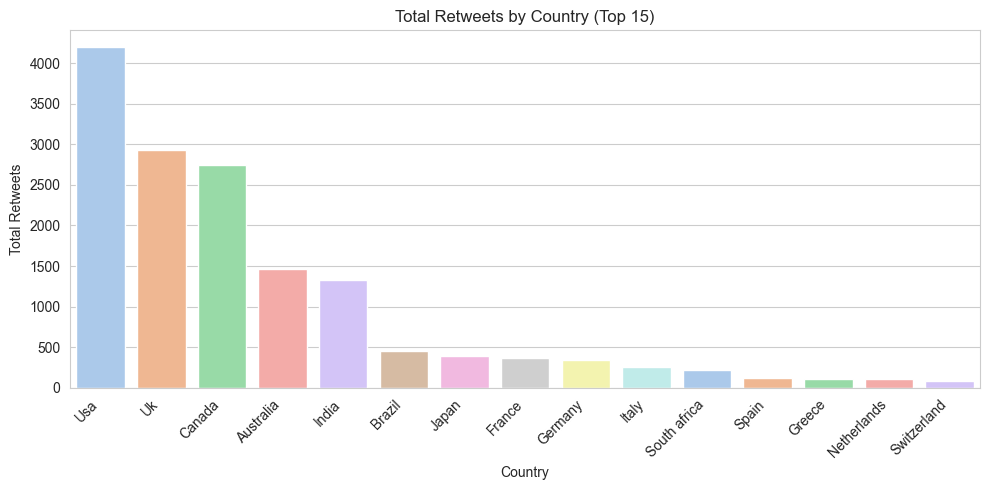

In [180]:
df['Country'] = df['Country'].str.strip().str.capitalize()
top_retweets = df.groupby('Country')['Retweets'].sum().nlargest(15).reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=top_retweets, x='Country', y='Retweets',hue='Country', palette='pastel')
plt.title("Total Retweets by Country (Top 15)")
plt.ylabel("Total Retweets")
plt.xlabel("Country")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Time based analysis

#### Average likes per hour

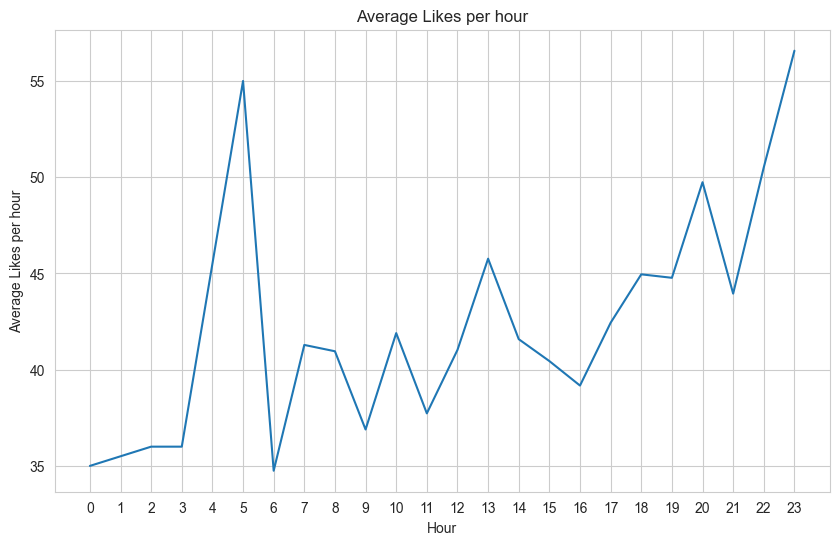

In [198]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df['Hour'], y=df['Likes'], estimator='mean', errorbar=None)
plt.title("Average Likes per hour")
plt.xlabel("Hour")
plt.ylabel("Average Likes per hour")
plt.xticks(range(0, 24))
plt.show()

#### Average Retweets per hour

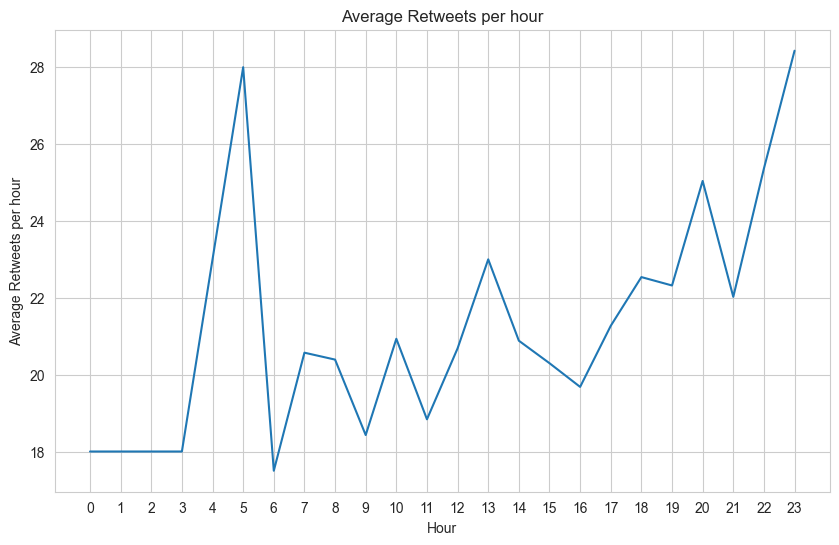

In [199]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df['Hour'], y=df['Retweets'], estimator='mean', errorbar=None)
plt.title("Average Retweets per hour")
plt.xlabel("Hour")
plt.ylabel("Average Retweets per hour")
plt.xticks(range(0, 24))
plt.show()

#### Busiest hour of the day

Hour with most posts: 14:00 with 94 posts


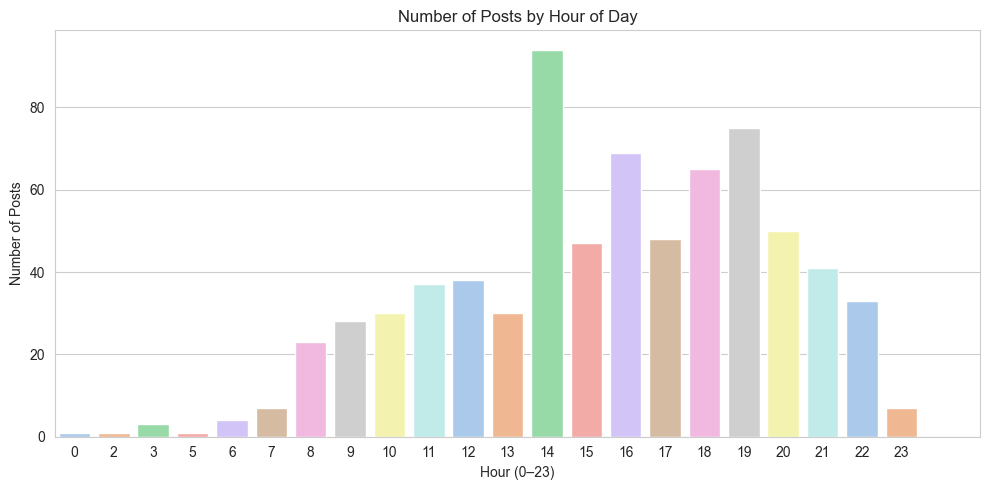

In [203]:
posts_by_hour = df['Hour'].value_counts().sort_index()

# Print top hour
busiest_hour = posts_by_hour.idxmax()
print(f"Hour with most posts: {busiest_hour}:00 with {posts_by_hour.max()} posts")

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=posts_by_hour.index, y=posts_by_hour.values,hue=posts_by_hour.index, palette="pastel", legend=False)
plt.title("Number of Posts by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Number of Posts")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

#### Busiest Day of the month

Day with most posts: 15 with 73 posts


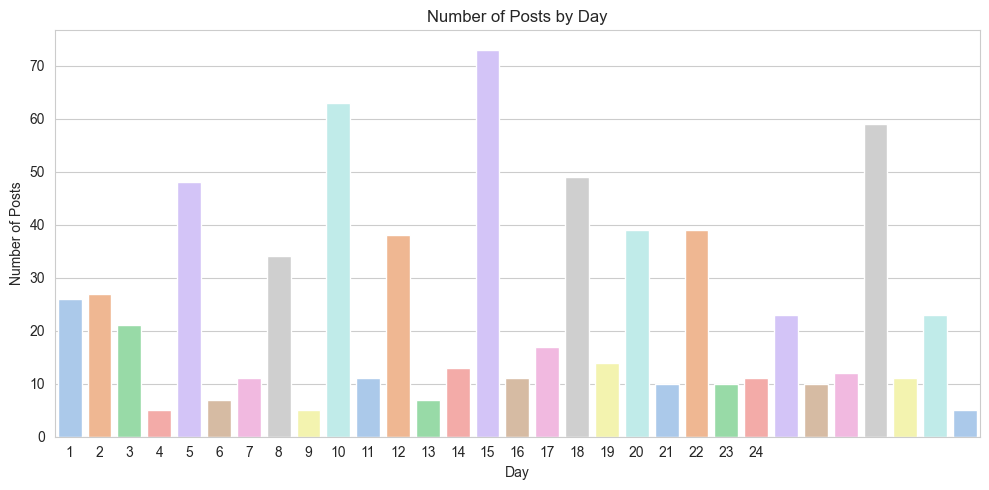

In [204]:
posts_by_day = df['Day'].value_counts().sort_index()

# Print top day
busiest_day = posts_by_day.idxmax()
print(f"Day with most posts: {busiest_day} with {posts_by_day.max()} posts")

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=posts_by_day.index, y=posts_by_day.values,hue=posts_by_day.index, palette="pastel", legend=False)
plt.title("Number of Posts by Day")
plt.xlabel("Day")
plt.ylabel("Number of Posts")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

### Total likes and countries 

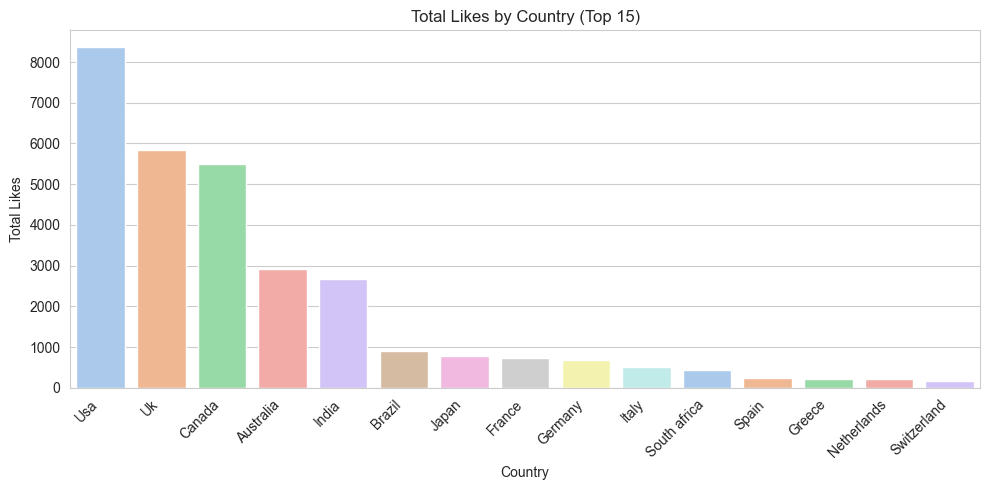

In [ ]:
df['Country'] = df['Country'].str.strip().str.capitalize()
top_likes = df.groupby('Country')['Likes'].sum().nlargest(15).reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=top_likes, x='Country', y='Likes',hue='Country', palette='pastel')
plt.title("Total Likes by Country (Top 15)")
plt.ylabel("Total Likes")
plt.xlabel("Country")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

<Axes: xlabel='Day'>

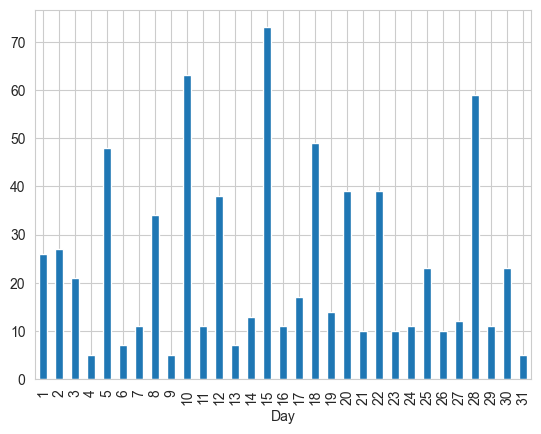

In [193]:
df['Day'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='Year'>

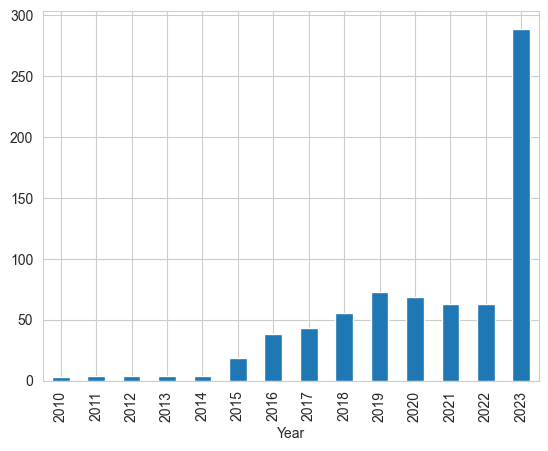

In [194]:
df['Year'].value_counts().sort_index().plot(kind='bar')